<h2> Import libraries </h2>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import yfinance as yf

from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

from Data_Retriever import DataRetriever as DatRet
from Markowitz_PT import MarkowitzPT as MPT
from BHB_Analyzer import BHBAnalyzer as BHBA

<h2> Define experimental variables </h2>

In [2]:
# Define number of trades
trading_n = 10

In [3]:
# Defining stock pool
ticker_df =  pd.DataFrame()
ticker_df["Petroleum"] = ["AKRBP.OL", "EQNR.OL", "ODL.OL"]
ticker_df["Materials"] = ["NHY.OL", "NSKOG.OL", "RANA.OL"]
ticker_df["Food"] = ["LSG.OL", "MOWI.OL", "ORK.OL"]
ticker_df

,Petroleum,Materials,Food
0,AKRBP.OL,NHY.OL,LSG.OL
1,EQNR.OL,NSKOG.OL,MOWI.OL
2,ODL.OL,RANA.OL,ORK.OL


<h2> Retrieve data </h2>

In [4]:
# Retrieve data from yf API
data = DatRet(ticker_df, "2022-02-19", "2025-02-18")
data.retrieve_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


'--Data retrieved successfully--'

<h2> Frequency trading using MPT </h2>

In [5]:
# Generate benchmark weights thorugh MPT using Sharpe ratio
benchmark = MPT(data.returns, 252,trading_n)
benchmark.frequency_optimizing()

--Frequency trading using MPT successfully performed--


<h2> Conduct performance analysis </h2>

In [6]:
# Performance analysis thorugh BHB
result_analysis = BHBA(benchmark.frequency_weights, 0, data.returns, 10)
result_analysis.frequency_analyze()

In [12]:
hotel = result_analysis.arit_excess_return

In [17]:
op = [hotel[i][3] for i in range(len(hotel))]
ae = [hotel[i][0] for i in range(len(hotel))]
se = [hotel[i][1] for i in range(len(hotel))]
ie = [hotel[i][2] for i in range(len(hotel))]

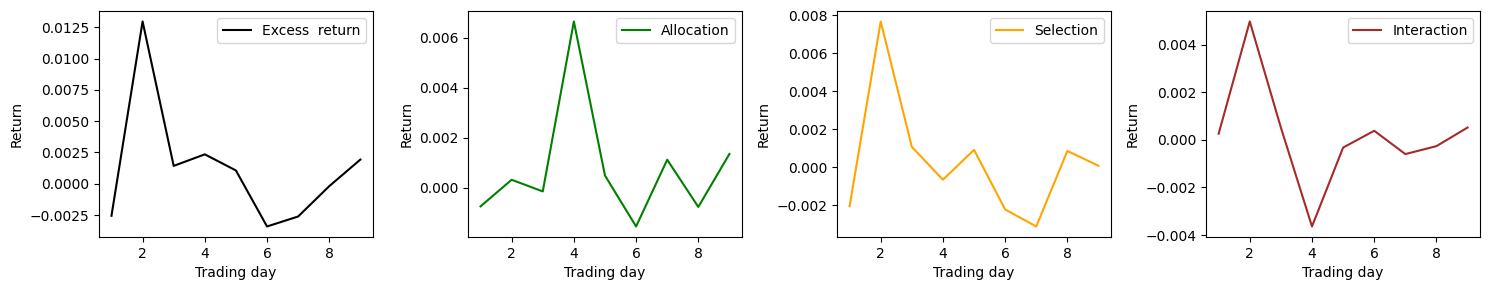

In [41]:
fig, ax = plt.subplots(1,4, figsize=(15,3))
data_arrays = [op, ae, se, ie]
data_labels = ["Excess  return", "Allocation", "Selection", "Interaction"]
colors = ["black", "green", "orange", "brown"]
for i in range(4):
    ax[i].plot(np.linspace(1,9,9),data_arrays[i], color =colors[i], label=data_labels[i])
    ax[i].set_xlabel("Trading day")
    ax[i].set_ylabel("Return")
    ax[i].legend()
# ax[0].plot(np.linspace(1,9,9),op, color ='green', label="Excess return")
# ax[0].plot(np.linspace(1,9,9),op, color ='green', label="Excess return")
# ax[0].plot(np.linspace(1,9,9),op, color ='green', label="Excess return")
# ax[0].legend()
# ax[1].plot(ae)
fig.tight_layout()

C:\Users\Jakob\AppData\Local\Temp\ipykernel_31320\651540412.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_arrays, labels=data_labels)


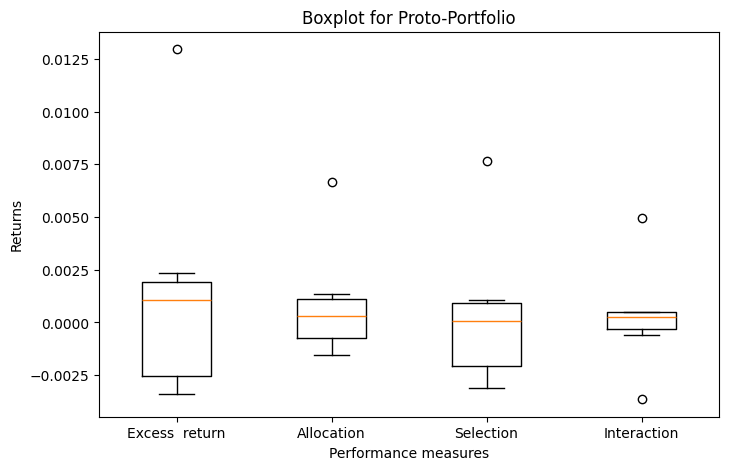

In [44]:
plt.figure(figsize=(8, 5))
plt.boxplot(data_arrays, labels=data_labels)

# Titles and labels
plt.title("Boxplot for Proto-Portfolio")
plt.xlabel("Performance measures")
plt.ylabel("Returns")

# Show the plot
plt.show()

The boxplot values should be transformed into z-values for better comparisment.